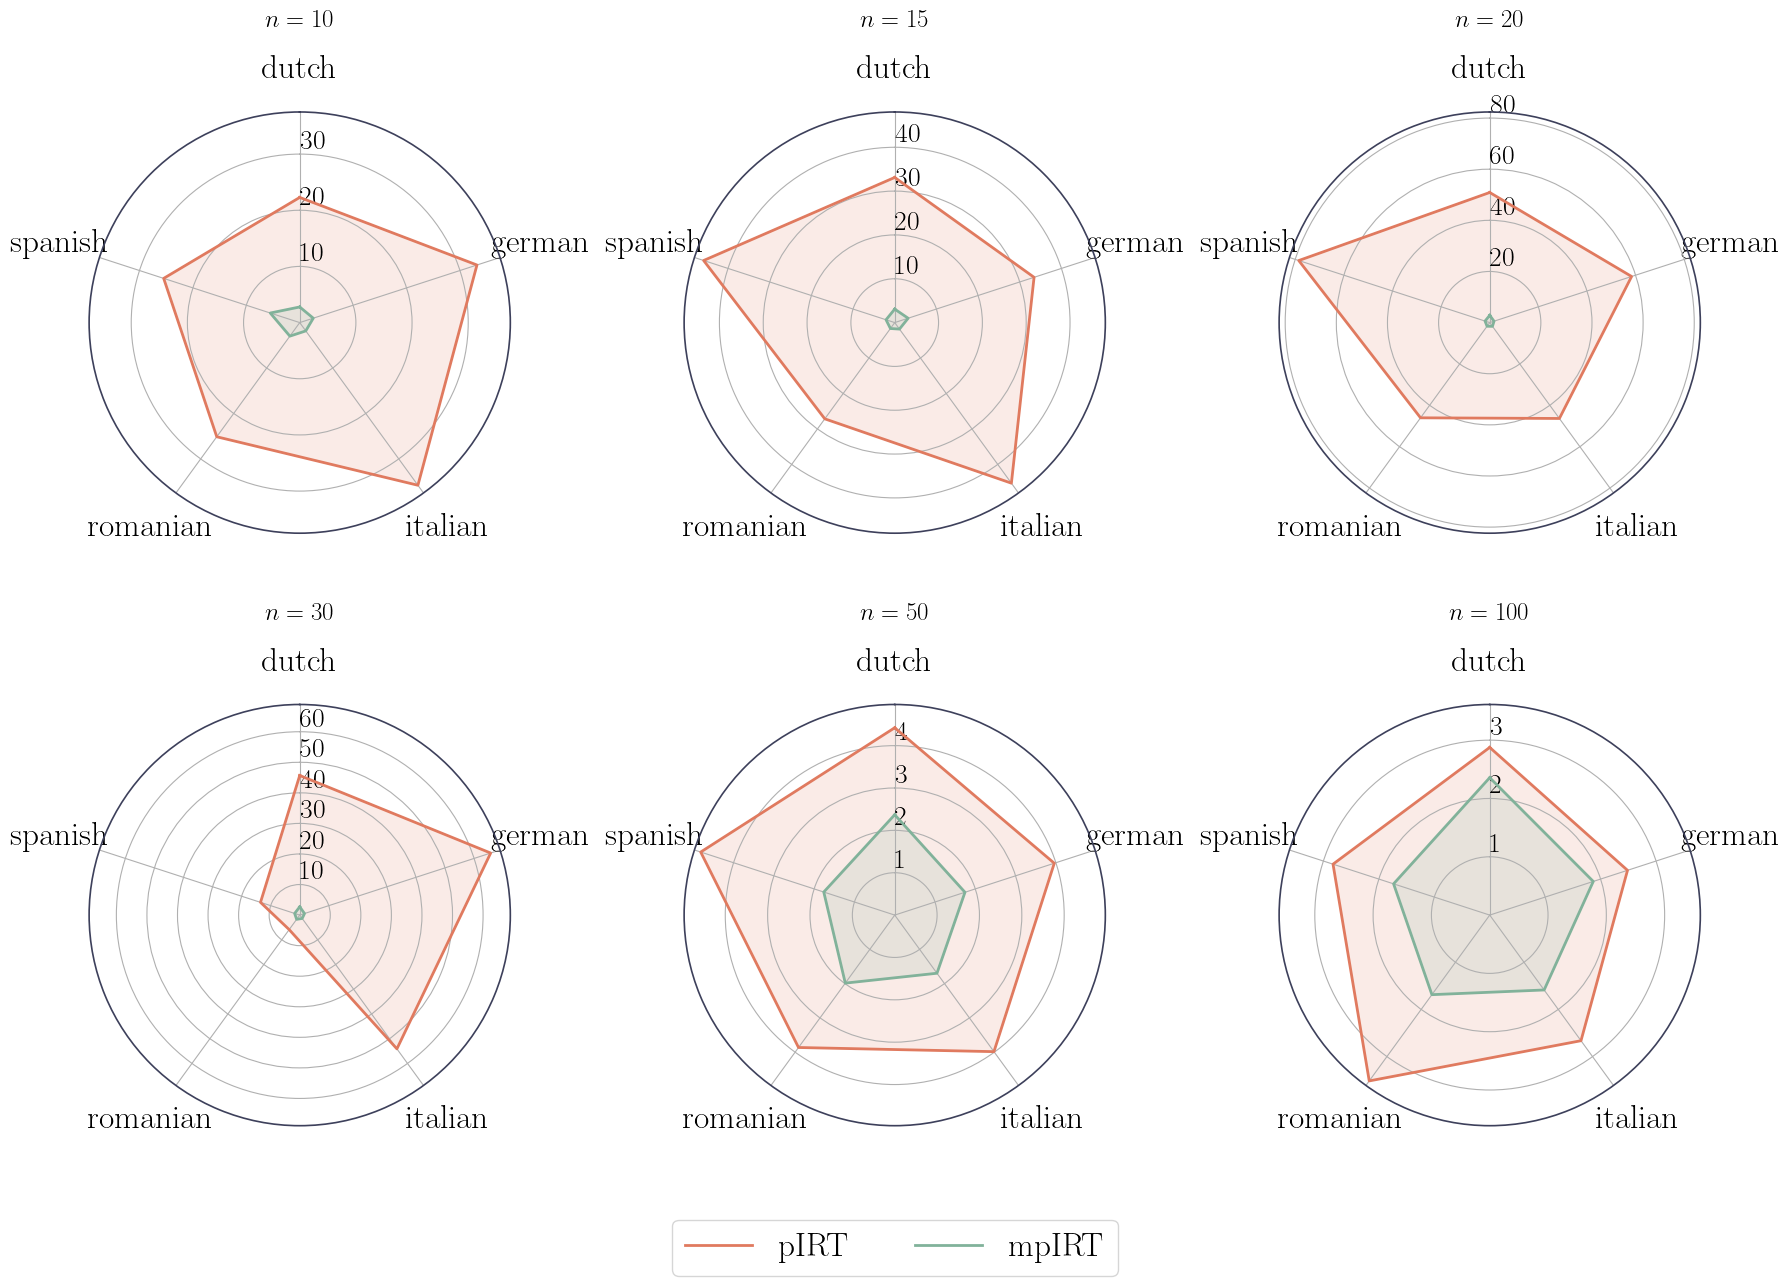

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
}

# Use LaTeX fonts for a professional look
plt.rcParams.update(
    {
        "text.usetex": True,         # Use LaTeX for text rendering
        "font.family": "serif",      # Use serif fonts
        "axes.titlesize": 24,        # Larger axes/title fonts
        "axes.labelsize": 24,
        "xtick.labelsize": 24,
        "ytick.labelsize": 20,
        "legend.fontsize": 24,
    }
)

# Read the CSV data
df = pd.read_csv("data/comparison_latent_abilities.csv")

# Ensure a consistent order of languages
languages = ["dutch", "german", "italian", "romanian", "spanish"]
df["lang"] = pd.Categorical(df["lang"], categories=languages, ordered=True)
df.sort_values(by=["clusters", "lang"], inplace=True)

# Unique cluster sizes
cluster_values = df["clusters"].unique()

# ------------------------------------------------------------------------
# A helper function to do the radar plotting on a given Axes object
# ------------------------------------------------------------------------
def radar_on_ax(ax, title, categories, values1, values2, label1, label2, color1, color2):
    """Plot two radars (values1, values2) on the existing Axes (ax)."""
    # Number of variables
    N = len(categories)

    # Angles for each category
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # close the polygon

    # For plotting
    v1 = np.concatenate((values1, [values1[0]]))
    v2 = np.concatenate((values2, [values2[0]]))

    # Make sure this Axes is polar
    ax.set_theta_offset(np.pi / 2)    # start from top
    ax.set_theta_direction(-1)        # go clockwise

    # Plot each set of values
    ax.plot(angles, v1, color=color1, linewidth=2, label=label1)
    ax.fill(angles, v1, color=color1, alpha=0.15)

    ax.plot(angles, v2, color=color2, linewidth=2, label=label2)
    ax.fill(angles, v2, color=color2, alpha=0.15)

    # Set category labels
    ax.set_thetagrids(angles[:-1] * 180 / np.pi, categories, fontsize=24)

    # Push the category labels outward
    ax.tick_params(axis='x', pad=20)   # Increase or decrease as needed

    # Title
    ax.set_title(title, fontsize=18, pad=20)

    # Style
    ax.spines["polar"].set_color(color_dict["Delft Blue"])
    ax.spines["polar"].set_linewidth(1.2)

    # Move radial labels away from categories
    ax.set_rlabel_position(0)

# ------------------------------------------------------------------------
# 1) FIGURE with 6 radars (one for each cluster value)
# ------------------------------------------------------------------------
# We'll arrange them in 2 rows x 3 columns (adjust as needed).
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12),
                         subplot_kw={"polar": True})

for i, cval in enumerate(cluster_values):
    row, col = divmod(i, ncols)
    ax = axes[row][col]

    # Subset DataFrame for this cluster
    subset = df[df["clusters"] == cval].set_index("lang").reindex(languages)

    # Euclidean data
    eucl_tb = subset["error_tb_eucl"].values
    eucl_lin = subset["error_lin_eucl"].values

    # Plot on this subplot
    radar_on_ax(
        ax=ax,
        title=fr"$n={cval}$",
        categories=languages,
        values1=eucl_tb,
        values2=eucl_lin,
        label1="pIRT",
        label2="mpIRT",
        color1=color_dict["Burnt sienna"],
        color2=color_dict["Cambridge blue"]
    )


# Legend at the bottom-center
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2)

# Handle empty subplot(s) if the number of clusters < (nrows*ncols)
# but here presumably you have exactly 6 cluster values. If you do not,
# you can optionally hide them:
# for j in range(i+1, nrows*ncols):
#     row, col = divmod(j, ncols)
#     axes[row][col].set_visible(False)

plt.tight_layout()
fig.savefig("figures/all_6_radars.pdf", bbox_inches="tight")
plt.show()


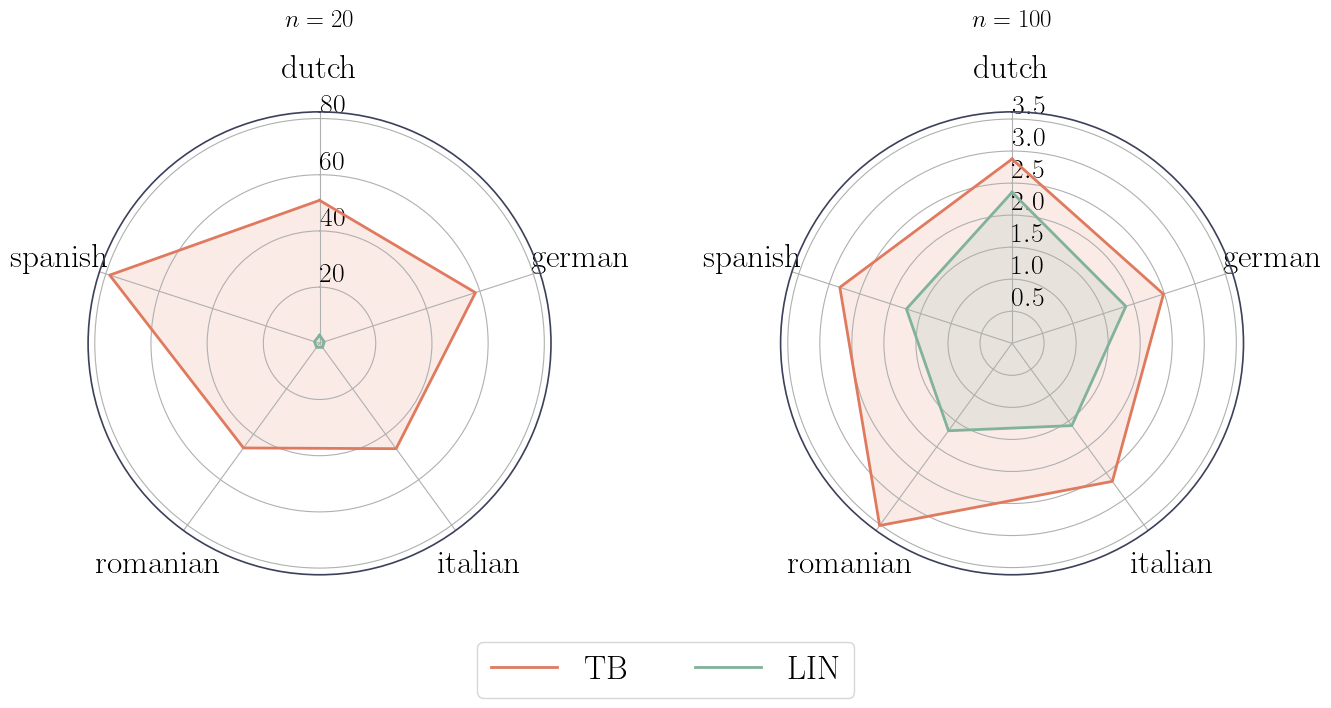

In [47]:
# ------------------------------------------------------------------------
# 2) FIGURE with ONLY 2 radars (for n=20 and n=100)
# ------------------------------------------------------------------------
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6),
                           subplot_kw={"polar": True})

# We only handle cluster_values 20 and 100
special_vals = [20, 100]
for idx, cval in enumerate(special_vals):
    ax = axes2[idx]

    subset = df[df["clusters"] == cval].set_index("lang").reindex(languages)

    eucl_tb = subset["error_tb_eucl"].values
    eucl_lin = subset["error_lin_eucl"].values

    radar_on_ax(
        ax=ax,
        title=fr"$n={cval}$",
        categories=languages,
        values1=eucl_tb,
        values2=eucl_lin,
        label1="TB",
        label2="LIN",
        color1=color_dict["Burnt sienna"],
        color2=color_dict["Cambridge blue"]
    )

# Legend at the bottom-center
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig2.legend(by_label.values(), by_label.keys(), loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.tight_layout()
fig2.savefig("figures/radars_n20_n100.pdf", bbox_inches="tight")
plt.show()